In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function creating the spiral
def spiral(max_num):
    '''Input: the number of points in the spiral to iterate through.
    Output: Returns the coordinats of all the points in the spiral, the coordinates of the corner numbers,
    and the spiral corner numbers'''
    pos = complex(0,0)
    movement = complex(1,0)
    turn = complex(0,1)
    side = 0
    x_coords = []
    y_coords = []
    corner_coords = []
    spiral_num = 1
    corner_nums = []
        
    count = max_num
    while count > 0:
        corner_coords.append([pos.real,pos.imag]) # finding the positions of the corners
        corner_nums.append(spiral_num) # finding the corner numbers
        if movement.imag == 0:
            side +=1
        k = min(count, side)
        count -= k
        while k>0:
            x_coords.append(pos.real)
            y_coords.append(pos.imag)
            pos += movement
            spiral_num +=1
            k = k-1
        movement = movement * turn
    return x_coords, y_coords, corner_coords, corner_nums

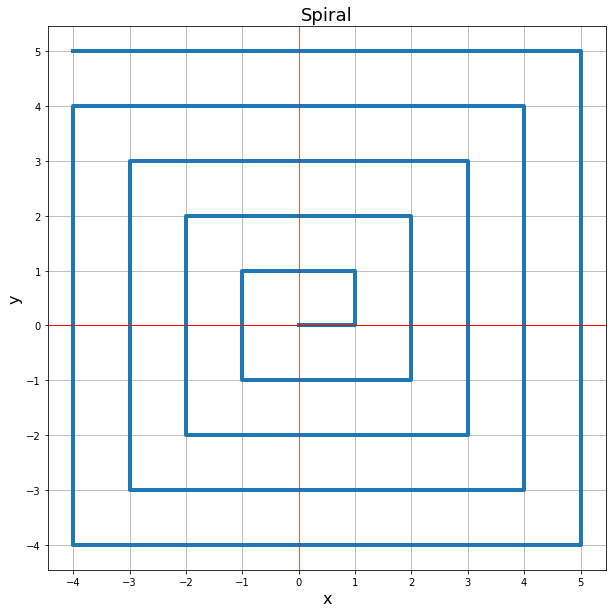

In [3]:
# Plotting the spiral
x, y,_,_ = spiral(100)
plt.figure(figsize=(10,10))
plt.plot(x,y, linewidth=4)
plt.axhline(0, color='r', linewidth=1)
plt.axvline(0, color='r', linewidth=.5)
plt.grid()
plt.xticks(np.arange(min(x), max(x)+1))
plt.yticks(np.arange(min(y), max(y)+1))
plt.xlabel('x', size=16)
plt.ylabel('y', size=16)
plt.title('Spiral', size=18)
plt.show()

In [4]:
# function calculating n(x)
def n(x):
    if x == 0:
        return 1
    if x < 0:
        return 4*(x**2) - x +1
    if x > 0:
        return 4*(x**2) -3*x +1
# Writing function that uses my formula to calculate the corner numbers of a certain x value
def corner_formula(x):
    if x == 0:
        return 1
    if x > 0:
        return n(x)+x, n(x)-x+1
    if x < 0:
        return n(x)+x, n(x)-x


In [5]:
### Now checking my formula with the Python method

_,_,corners, corner_numbers = spiral(1000) #generating 1000 numberes in the spiral


#finding x coordinates of corners to use in my formula
corner_xcoords = []
for c in corners:
    corner_xcoords.append(c[0])

# finding the corner numbers calculated by my formula
my_corner_numbers = []
for k in np.arange(min(corner_xcoords), max(corner_xcoords)+1):
    if k==0:
        my_corner_numbers.append(int(corner_formula(k)))
    else:
        my_corner_numbers.append(int(corner_formula(k)[0]))
        my_corner_numbers.append(int(corner_formula(k)[1]))
my_corner_numbers.sort()

# checking if my formula is correct
if corner_numbers == my_corner_numbers:
    print('My formula is correct')
else:
    print('We have a problem')

My formula is correct
